<a href="https://colab.research.google.com/github/prxrwx/Stat-learning-for-datasci/blob/main/Polynomial-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Sample points

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

N = 8
x = 10 ** np.linspace(-2, 0, N)
y = np.random.normal(loc = 10 - 1. / (x + 0.1), scale= 0.5)

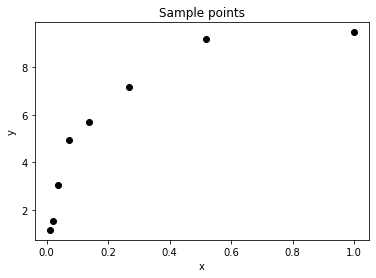

In [3]:
plt.figure()
plt.scatter(x, y, c='k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sample points');

###Polynomial regression

In [4]:
p = np.polyfit(x, y, 2)


xfit = np.linspace(-0.2, 1.2, 1000)
yfit = np.polyval(p, xfit)

p

array([-16.39270025,  23.76137857,   1.94612811])

Text(0.5, 1.0, 'd = 2')

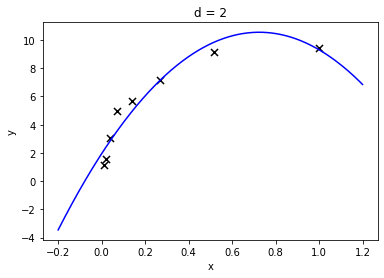

In [5]:
plt.figure()
plt.scatter(x, y, marker='x', c='k', s=50)
plt.plot(xfit, yfit, '-b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('d = 2')

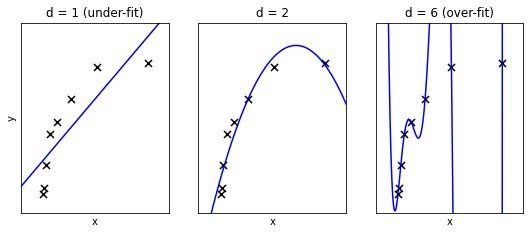

In [6]:
xfit = np.linspace(-0.2, 1.2, 1000)

titles = ['d = 1 (under-fit)', 'd = 2', 'd = 6 (over-fit)']
degrees = [1, 2, 6]

plt.figure(figsize = (9, 3.5))
for i, d in enumerate(degrees):
    plt.subplot(131 + i, xticks=[], yticks=[])
    plt.scatter(x, y, marker='x', c='k', s=50)

    p = np.polyfit(x, y, d)
    yfit = np.polyval(p, xfit)
    plt.plot(xfit, yfit, '-b')
    
    plt.xlim(-0.2, 1.2)
    plt.ylim(0, 12)
    plt.xlabel('x')
    if i == 0:
        plt.ylabel('y')

    plt.title(titles[i])

In [7]:
np.random.seed(42)

Ntrain = 20
Ntest = 20
error = 1.0

np.random.seed(0)
x = np.random.random(Ntrain + Ntest)
y = np.random.normal(loc = 10 - 1. / (x + 0.1), scale= 0.5)

xtrain = x[:Ntrain]
ytrain = y[:Ntrain]

xtest = x[Ntrain:]
ytest = y[Ntrain:]

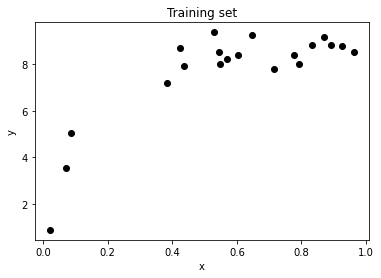

In [8]:
plt.scatter(xtrain, ytrain, c='k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training set');

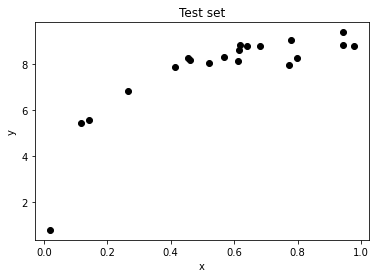

In [9]:
plt.scatter(xtest, ytest, c='k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Test set');

####ในกรณีนี้ เราใช้ squared-loss ดังนั้น empirical risk เท่ากับ MSE (mean-squared error) 

In [10]:
def empirical_risk(y, yfit):
    return np.mean((y - yfit) ** 2)

#Exercise: 
1. ทำการสร้าง polynomial regression ที่มีค่า degree ตั้งแต่ 1-10 โดยใช้ training set ข้างบน 
2. หลังจากสร้างโมเดลแต่ละตัวเสร็จแล้ว ให้คำนวณค่า empirical risk ของการทำนายบน test set เก็บค่าที่ได้ไว้ใน list ที่ชื่อว่า `empirical_risks` (เพราะฉะนั้น list นี้จะมีสมาชิก 10 ตัว)
3. สร้าง plot โดยให้แกนนอนคือค่า degree ของโมเดลแต่ละตัว และแกนตั้งคือค่า empirical risk ของโมเดลตัวนั้น 
4. ระบุค่า degree ที่มี empirical risk ต่ำที่สุด
ค่า degree ไหนบ้างที่ทำให้โมเดล overfit และค่า degree ไหนบ้างที่ทำให้โมเดล underfit

In [11]:
%%capture
max_deg = 10

empirical_risks = [0]*max_deg

for i in range(1, max_deg +1):
  p = np.polyfit(xtrain, ytrain, i)

  y = np.polyval(p, xtest)
  empirical_risks[i-1] = empirical_risk(ytest, y)

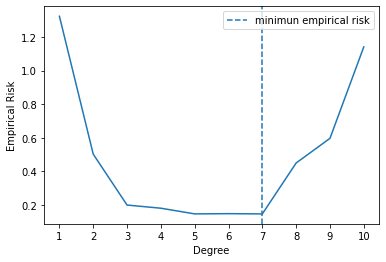

In [12]:
plt.figure()
plt.plot(np.arange(1, 1+max_deg), empirical_risks)
plt.xticks(np.arange(1, 1+max_deg, 1.0))
plt.xlabel("Degree")
plt.ylabel("Empirical Risk")
plt.axvline(x=1+np.argmin(empirical_risks), ls="--", label="minimun empirical risk")
plt.legend()
plt.show()

จากกราฟได้ว่า ค่าต่ำสุดของ empirical risk เกิด ณ degree เท่ากับ 7 และเกิด underfitting สำหรับพหุนามดีกรี  < 7 ส่วน overfitting เกิดที่พหุนามดีกรี  ≥ 8 (หรือมากกว่า 7)